# 📊 Exploración Inicial de Medallas Olímpicas
Este notebook tiene como objetivo explorar de forma preliminar el dataset `medallas_historicas.csv`, analizando su estructura, valores faltantes, estadísticas generales y primeras tendencias.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Cargar el dataset
df = pd.read_csv("../data/medallas_historicas.csv")


## Vista general del dataset

In [3]:
df.head()


,Año,País,Oro,Plata,Bronce,Total
0,1896,United States,11,7,2,20
1,1896,Greece,10,18,19,47
2,1896,Germany,6,5,2,13
3,1896,France,5,4,2,11
4,1896,Great Britain,2,3,2,7


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Año     1063 non-null   int64 
 1   País    1063 non-null   object
 2   Oro     1063 non-null   int64 
 3   Plata   1063 non-null   int64 
 4   Bronce  1063 non-null   int64 
 5   Total   1063 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 50.0+ KB


In [5]:
df.describe(include='all')


,Año,País,Oro,Plata,Bronce,Total
count,1063.000000,1063,1063.000000,1063.000000,1063.000000,1063.000000
unique,NaN,123,NaN,NaN,NaN,NaN
top,NaN,France,NaN,NaN,NaN,NaN
freq,NaN,30,NaN,NaN,NaN,NaN
mean,1979.187206,NaN,5.351834,5.239887,5.636877,16.228598
std,35.663231,NaN,9.432604,7.912173,7.556930,24.039896
min,1896.000000,NaN,0.000000,0.000000,0.000000,1.000000
25%,1956.000000,NaN,1.000000,1.000000,1.000000,3.000000
50%,1988.000000,NaN,2.000000,2.000000,3.000000,7.000000
75%,2008.000000,NaN,6.000000,6.000000,7.000000,19.000000


## Verificación de valores nulos

In [6]:
df.isnull().sum()


Año       0
País      0
Oro       0
Plata     0
Bronce    0
Total     0
dtype: int64

## Países y años únicos

In [7]:
print("Países únicos:", df["País"].nunique())
print("Años únicos:", df["Año"].nunique())
print("Rango de años:", df["Año"].min(), "-", df["Año"].max())


Países únicos: 123
Años únicos: 30
Rango de años: 1896 - 2024


## Total de medallas por edición

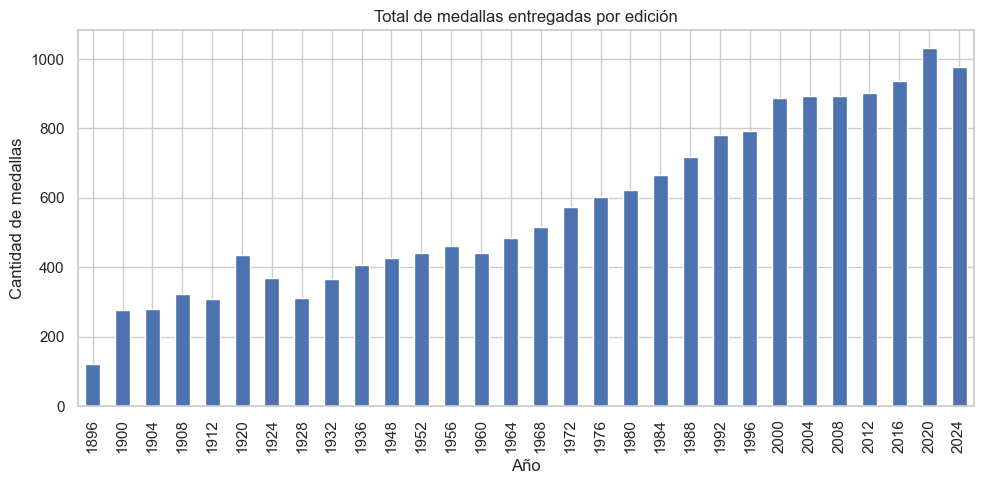

In [8]:
df["Total"] = df["Oro"] + df["Plata"] + df["Bronce"]

df.groupby("Año")["Total"].sum().plot(kind="bar", title="Total de medallas entregadas por edición")
plt.ylabel("Cantidad de medallas")
plt.xlabel("Año")
plt.tight_layout()
plt.show()


## Top 15 países con más medallas en total

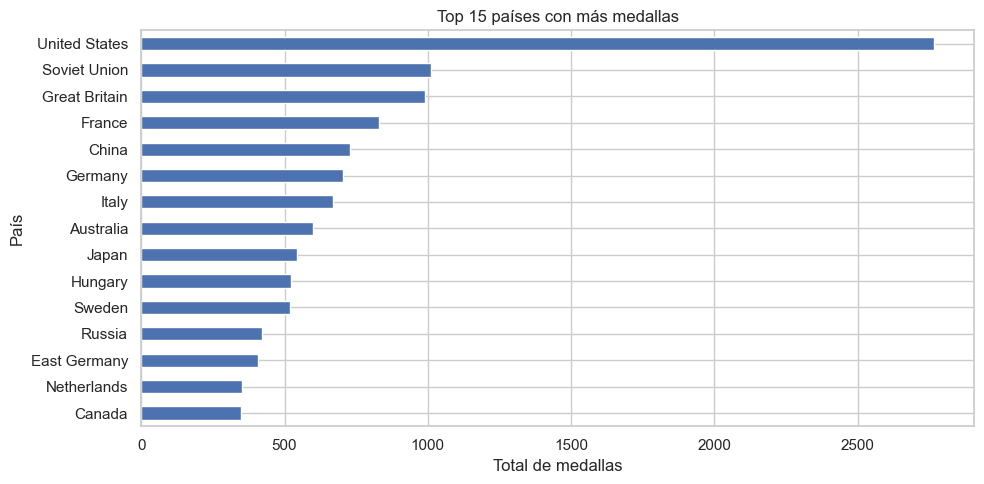

In [9]:
ranking_total = df.groupby("País")["Total"].sum().sort_values(ascending=False).head(15)

ranking_total.plot(kind="barh", title="Top 15 países con más medallas")
plt.xlabel("Total de medallas")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Conclusiones exploratorias
- El dataset contiene información de múltiples ediciones de los Juegos Olímpicos.
- Se analizaron los valores nulos, la distribución de países y años.
- Se identificaron los países con mayor cantidad de medallas en la historia olímpica.